In [1]:
import math
import scipy.special
import scipy.special as sc
import numpy as np

from scipy.stats import beta
import numpy as np
#from calc_prob import calc_prob_between
from math import lgamma

In [2]:
def bln(one,two):
    return scipy.special.betaln(one, two)

In [281]:
## test data
my_array = []
my_array.append([1000,8])
my_array.append([1000,1])
my_array.append([1000,3])
#my_array.append([1000,8])

my_array

[[1000, 8], [1000, 1], [1000, 3]]

In [282]:
## alpha == nSuccesses + 1
## beta == nFailures + 1
##
## alpha = nConvs + 1
## beta == nImp - (alpha == nConvs + 1)

In [283]:
## test 
my_array[1][1]

1

In [284]:
alpha = []
beta = []
for i in my_array:
    alpha.append(i[1]+1)
    beta.append(i[0]-(i[1]+1))
print(alpha)
print(beta)


[9, 2, 4]
[991, 998, 996]


In [285]:
beta0 = bln(alpha[0],beta[0])
beta0

-51.52005142923463

In [286]:
#sizer = len(alpha)
#summer = np.zeros((len(alpha),1))
#for s in range(0,sizer):
#    summer[s] = 1
#summer

In [299]:
sizer = len(alpha)
summer = np.zeros((len(alpha),1))
beta0 = bln(alpha[0],beta[0])
#for s in range(0,sizer):
    #summer[s] = 1
#summer

done = False
l2 = False

total = 0

counter = 0-1
while not done:
    counter += 1
    print('Iteration: {}\n'.format(counter))
    
    num = 0
    den = 0
    
    n1 = sum(summer[1:len(summer)])+alpha[0]
    print('\nalpha_c: {}\ni: {}\nj: {}\nn1: {}\n'.format(alpha[0],summer[1],summer[2],n1))
    #n2 = beta0
    n2 = sum(beta)
    print('\nbeta_a: {}\nbeta_b: {}\nbeta_c: {}\nsum: {}\n'.format(beta[0],beta[1],beta[2],sum(beta)))
    num = bln(n1,n2)
    print('num: {}'.format(num))
    
    ## den; part 01/02
    c2 = 0-1
    for de in range(0,sizer):
        c2 += 1
        den += math.log(beta[de] + summer[de])

    ## den; part 02/02
    c3 = 0-1
    for de in range(0,sizer):
        c3 += 1
        den += bln(1+summer[de],beta[de])
        
    den += beta0
    print('den: {}'.format(den))
    print('\n')
    
    ## total; part 01/01
    total += math.exp(num-den)
    print('thisTotal: {}\ntotal: {}'.format(math.exp(num-den),total))
    
    print('\n')
    ## summer manipulation
    for cd in range(sizer-1,0-1,-1):
        #print(cd)
        if not summer[cd]+1 >= alpha[cd]:
            #print('if1')
            print('summer: {}\nalpha: {}'.format(summer[cd],alpha[cd]))
            summer[cd] += 1
            break
        else:
            #print('else')
            l2count = 0
            for cd2 in range(sizer-1,0-1,-1):
                if summer[cd2]+1 == alpha[cd2]: 
                    l2count += 1
            if l2count+1 == sizer:
                l2=True

            summer[cd] = 0
    #l2 = True
    if l2:
        done = True
    #print('\n')
    #print('summerArray: {}'.format(summer))
        
        
    
    
    ## temporary
    #if counter >=10: done = True
    #print('\n')
    
    print('*'*80,'\n')
    
total

Iteration: 0


alpha_c: 9
i: [0.]
j: [0.]
n1: [9.]


beta_a: 991
beta_b: 998
beta_c: 996
sum: 2985

num: [-61.4196412]
den: [-51.52005143]


thisTotal: 5.019526940528076e-05
total: 5.019526940528076e-05


summer: [0.]
alpha: 4
******************************************************************************** 

Iteration: 1


alpha_c: 9
i: [0.]
j: [1.]
n1: [10.]


beta_a: 991
beta_b: 998
beta_c: 996
sum: 2985

num: [-67.22678219]
den: [-58.42379869]


thisTotal: 0.00015028403304964355
total: 0.00020047930245492432


summer: [1.]
alpha: 4
******************************************************************************** 

Iteration: 2


alpha_c: 9
i: [0.]
j: [2.]
n1: [11.]


beta_a: 991
beta_b: 998
beta_c: 996
sum: 2985

num: [-72.92889661]
den: [-64.63540228]


thisTotal: 0.0002501388663606538
total: 0.0004506181688155781


summer: [2.]
alpha: 4
******************************************************************************** 

Iteration: 3


alpha_c: 9
i: [0.]
j: [3.]
n1: [12.]


beta_a: 99

0.0035449297218330626

In [361]:
def summation(alpha,beta):
    ## returns probabilty that first value (?)
    ## is likely to be better than the rest
    sizer = len(alpha)
    summer = np.zeros((len(alpha),1))
    beta0 = bln(alpha[0],beta[0])
    
    done = False
    l2 = False

    total = 0

    counter = 0-1
    while not done:
        counter += 1
        #print('Iteration: {}\n'.format(counter))

        num = 0
        den = 0

        n1 = sum(summer[1:len(summer)])+alpha[0]
        #print('\nalpha_c: {}\ni: {}\nj: {}\nn1: {}\n'.format(alpha[0],summer[1],summer[2],n1))
        #n2 = beta0
        n2 = sum(beta)
        #print('\nbeta_a: {}\nbeta_b: {}\nbeta_c: {}\nsum: {}\n'.format(beta[0],beta[1],beta[2],sum(beta)))
        num = bln(n1,n2)
        #print('num: {}'.format(num))

        ## den; part 01/02
        c2 = 0-1
        for de in range(0,sizer):
            c2 += 1
            den += math.log(beta[de] + summer[de])

        ## den; part 02/02
        c3 = 0-1
        for de in range(0,sizer):
            c3 += 1
            den += bln(1+summer[de],beta[de])

        den += beta0
        #print('den: {}'.format(den))
        #print('\n')

        ## total; part 01/01
        total += math.exp(num-den)
        #print('thisTotal: {}\ntotal: {}'.format(math.exp(num-den),total))

        printer = True
        printer = False
        if printer:
            print('Iteration: {}\n'.format(counter))
            print('\nalpha_c: {}\ni: {}\nj: {}\nn1: {}\n'.format(alpha[0],summer[1],summer[2],n1))
            print('\nbeta_a: {}\nbeta_b: {}\nbeta_c: {}\nsum: {}\n'.format(beta[0],beta[1],beta[2],sum(beta)))
            print('num: {}'.format(num))
            print('den: {}'.format(den))
            print('\n')
            print('thisTotal: {}\ntotal: {}'.format(math.exp(num-den),total))
            print('\n')
            print('*'*80,'\n')

        
        
        #print('\n')
        ## summer manipulation
        for cd in range(sizer-1,0-1,-1):
            #print(cd)
            if not summer[cd]+1 >= alpha[cd]:
                #print('if1')
                #print('summer: {}\nalpha: {}'.format(summer[cd],alpha[cd]))
                summer[cd] += 1
                break
            else:
                #print('else')
                l2count = 0
                for cd2 in range(sizer-1,0-1,-1):
                    if summer[cd2]+1 == alpha[cd2]: 
                        l2count += 1
                if l2count+1 == sizer:
                    l2=True

                summer[cd] = 0
        #l2 = True
        if l2:
            done = True
        #print('\n')
        #print('summerArray: {}'.format(summer))




        ## temporary
        #if counter >=10: done = True
        #print('\n')

        #print('*'*80,'\n')

    total
    return total

In [312]:
summation(alpha,beta)

0.0035449297218330626

In [42]:
alpha

[2, 4, 9]

In [135]:
def alpha_beta(my_array):
    alpha = []
    beta = []
    for i in my_array:
        alpha.append(i[1]+1)
        beta.append(i[0]-(i[1]+1))
    #print(alpha)
    #print(beta)
    return alpha,beta

alpha_beta(my_array)

([2, 4], [998, 996])

In [295]:
## test data
my_array = []
my_array.append([1000,8])
my_array.append([1000,1])
my_array.append([1000,2])
#my_array.append([1000,8])

my_array

[[1000, 8], [1000, 1], [1000, 2]]

In [296]:

a1,b1 = alpha_beta(my_array)
print(a1,b1)

[9, 2, 3] [991, 998, 997]


In [297]:
summation(a1,b1)

0.0020139495311205157

In [340]:
def pba(alpha1,beta1):
    ## first term over second term a[0]&b[0] over a[1]&b[1]
    #alpha_a, beta_a, alpha_b, beta_b
    alpha_a = alpha1[0]
    alpha_b = alpha1[1]
    beta_a = beta1[0]
    beta_b = beta1[1]
    total = 0.0
    equals = 0
    counter = 0-1
    for i in range(0,alpha_a-1+1):
        counter += 1
        num = bln(alpha_b+i, beta_a + beta_b)
        den = math.log(beta_a+i) + bln(1+i,beta_b) + bln(alpha_b,beta_b)
        equals = math.exp(num-den)
        total += equals
        #print('{}: {}\n\nadded: {}\nnum: {}\nden: {}\n'.format(counter,total,equals,num,den),'*'*80)
        #print(alpha_a, beta_a, alpha_b, beta_b)
        #print('\n')
    return total

def pab(alpha1,beta1):
    ## first term over second term a[0]&b[0] over a[1]&b[1]
    #alpha_a, beta_a, alpha_b, beta_b
    alpha_a = alpha1[0]
    alpha_b = alpha1[1]
    beta_a = beta1[0]
    beta_b = beta1[1]
    total = 0.0
    equals = 0
    counter = 0-1
    for i in range(0,alpha_a-1+1):
        counter += 1
        num = bln(alpha_b+i, beta_a + beta_b)
        den = math.log(beta_a+i) + bln(1+i,beta_a) + bln(alpha_b,beta_b)
        equals = math.exp(num-den)
        total += equals
        #print('{}: {}\n\nadded: {}\nnum: {}\nden: {}\n'.format(counter,total,equals,num,den),'*'*80)
        #print(alpha_a, beta_a, alpha_b, beta_b)
        #print('\n')
    return total

def probability_C_beats_A_and_B(a_A, ß_A, a_B, ß_B, a_C, ß_C):
    total = 0.0
    counter = 0-1
    for i in range(0,a_A-1+1):
        for j in range(0,a_B-1+1):
            counter += 1
            total += math.exp(scipy.special.betaln(a_C+i+j, ß_A+ß_B+ß_C) - math.log(ß_A+i) - math.log(ß_B+j) - scipy.special.betaln(1+i, ß_A) - scipy.special.betaln(1+j, ß_B) - scipy.special.betaln(a_C, ß_C))
            #den = -math.log(ß_A+i) - math.log(ß_B+j) - scipy.special.betaln(1+i, ß_A) - scipy.special.betaln(1+j, ß_B) - scipy.special.betaln(a_C, ß_C)
            #print('\nalphaC: {}\ni: {}\nj: {}\n'.format(a_C,i,j))
            #print('\nbetaA: {}\nbetaB: {}\nbetaC: {}\n'.format(ß_A, ß_B, ß_C))
            #print('\nn1: {}\nn2: {}\n'.format(a_C+i+j, ß_A+ß_B+ß_C))
            #print('\nnum: {}\nden: {}\n'.format(scipy.special.betaln(a_C+i+j, ß_A+ß_B+ß_C),-den))
            #print('{}: {}\n'.format(counter,total))
            
    print(probability_B_beats_A(a_C, ß_C, a_A, ß_A))
    print(probability_B_beats_A(a_C, ß_C, a_A, ß_A)) 
    print(total)

    return (1 - probability_B_beats_A(a_C, ß_C, a_A, ß_A) - probability_B_beats_A(a_C, ß_C, a_B, ß_B) + total)


def probability_C_beats_A_and_B2(alpha1,beta1):
    alpha_a = alpha1[2]
    alpha_b = alpha1[1]
    alpha_c = alpha1[0]
    beta_a = beta1[2]
    beta_b = beta1[1]
    beta_c = beta1[0]
    total = 0.0
    counter = 0-1
    for i in range(0,a_A-1+1):
        for j in range(0,a_B-1+1):
            counter += 1
            total += math.exp(scipy.special.betaln(a_C+i+j, ß_A+ß_B+ß_C) - math.log(ß_A+i) - math.log(ß_B+j) - scipy.special.betaln(1+i, ß_A) - scipy.special.betaln(1+j, ß_B) - scipy.special.betaln(a_C, ß_C))
            #den = -math.log(ß_A+i) - math.log(ß_B+j) - scipy.special.betaln(1+i, ß_A) - scipy.special.betaln(1+j, ß_B) - scipy.special.betaln(a_C, ß_C)
            #print('\nalphaC: {}\ni: {}\nj: {}\n'.format(a_C,i,j))
            #print('\nbetaA: {}\nbetaB: {}\nbetaC: {}\n'.format(ß_A, ß_B, ß_C))
            #print('\nn1: {}\nn2: {}\n'.format(a_C+i+j, ß_A+ß_B+ß_C))
            #print('\nnum: {}\nden: {}\n'.format(scipy.special.betaln(a_C+i+j, ß_A+ß_B+ß_C),-den))
            #print('{}: {}\n'.format(counter,total))

    return (1 - pba(alpha1,beta1) - pba(alpha1,beta1) + total)


## nope.
def probability_A_beats_B_and_C(alpha1,beta1):
    alpha_a = alpha1[0]; α_A = alpha_a
    alpha_b = alpha1[1]; α_B = alpha_b 
    alpha_c = alpha1[2]; α_C = alpha_c
    beta_a = beta1[0]; β_A = beta_a
    beta_b = beta1[1]; β_B = beta_b
    beta_c = beta1[2]; β_C = beta_c
    
    print_ab = False
    if print_ab:
        print('alpha: {}'.format(alpha1))
        #print('[[a_b,a_a][b_b,b_a]]: {},{}'.format([alpha_b,alpha_a],[beta_b,beta_a]))
        print('beta: {}'.format(beta1))
        
    total = 0.0
    counter = 0-1
    for i in range(0,α_B-1+1):
        for j in range(0,α_C-1+1):
            counter += 1
            total += math.exp(scipy.special.betaln(α_A+i+j, β_A+β_B+β_C) - math.log(β_B+i) - math.log(β_C+j) - scipy.special.betaln(1+i, β_B) - scipy.special.betaln(1+j, β_C) - scipy.special.betaln(α_A, β_A))
            #den = -math.log(β_A+i) - math.log(β_B+j) - scipy.special.betaln(1+i, β_A) - scipy.special.betaln(1+j, β_B) - scipy.special.betaln(α_C, β_C)
            #print('\nalphaC: {}\ni: {}\nj: {}\n'.format(α_C,i,j))
            #print('\nbetaA: {}\nbetaB: {}\nbetaC: {}\n'.format(β_A, β_B, β_C))
            #print('\nn1: {}\nn2: {}\n'.format(α_C+i+j, β_A+β_B+β_C))
            #print('\nnum: {}\nden: {}\n'.format(scipy.special.betaln(α_C+i+j, β_A+β_B+β_C),-den))
            #print('{}: {}\n'.format(counter,total))
            
    #print('a1: {}'.format([alpha_b,alpha_a]))
    #print('b1: {}'.format([alpha_b,alpha_a]))
    print_this1 = False
    if print_this1:
        print('b > a: {}'.format(pab([alpha_b,alpha_a],[beta_b,beta_a])))
        print('c > a: {}'.format(pab([alpha_c,alpha_a],[beta_c,beta_a])))
        print('\n')
        
    print_this = False
    if print_this:
        print('total: {}'.format(total))
        print('summation fx: {}\n'.format(summation(alpha1,beta1)))

    return (1 - pab([alpha_b,alpha_a],[beta_b,beta_a]) - pab([alpha_c,alpha_a],[beta_c,beta_a]) + summation(alpha1,beta1))
    #return (1 - pab([alpha_b,alpha_a],[beta_b,beta_a]) - pab([alpha_c,alpha_a],[beta_c,beta_a]) + total)

In [375]:

def probability_A_beats_BCD(alpha1,beta1):
    alpha_a = alpha1[0]; α_A = alpha_a
    alpha_b = alpha1[1]; α_B = alpha_b 
    alpha_c = alpha1[2]; α_C = alpha_c
    alpha_d = alpha1[3]; α_D = alpha_d
    beta_a = beta1[0]; β_A = beta_a
    beta_b = beta1[1]; β_B = beta_b
    beta_c = beta1[2]; β_C = beta_c
    beta_d = beta1[3]; β_D = beta_d
    
    print_ab = False
    if print_ab:
        print('alpha: {}'.format(alpha1))
        #print('[[a_b,a_a][b_b,b_a]]: {},{}'.format([alpha_b,alpha_a],[beta_b,beta_a]))
        print('beta: {}'.format(beta1))
    
    a_abc = alpha1.copy(); a_abc.pop(3)
    #print(a_abc)
    a_acd = alpha1.copy(); a_acd.pop(1)
    #print(a_acd)
    a_abd = alpha1.copy(); a_abd.pop(2)
    #print(a_abd)
    b_abc = beta1.copy(); b_abc.pop(3)
    #print(b_abc)
    b_acd = beta1.copy(); b_acd.pop(1)
    #print(b_acd)
    b_abd = beta1.copy(); b_abd.pop(2)
    #print(b_abd)
    
    total = 0.0
    counter = 0-1
    for i in range(0,α_B-1+1):
        for j in range(0,α_C-1+1):
            for k in range(0,α_D-1+1):
                counter += 1
                #total += math.exp(scipy.special.betaln(α_A+i+j+k, β_A+β_B+β_C+β_D) - math.log(β_B+i) - math.log(β_C+j) - math.log(β_D+k) - scipy.special.betaln(1+i, β_B) - scipy.special.betaln(1+j, β_C) - scipy.special.betaln(1+k, β_D) - scipy.special.betaln(α_A, β_A))
                num = scipy.special.betaln(α_A+i+j+k, β_A+β_B+β_C+β_D)
                den = math.log(β_B+i) + math.log(β_C+j) + math.log(β_D+k) + scipy.special.betaln(1+i, β_B) + scipy.special.betaln(1+j, β_C) + scipy.special.betaln(1+k, β_D) + scipy.special.betaln(α_A, β_A)
                result = num - den
                total += math.exp(result)
                #print('\nalphaC: {}\ni: {}\nj: {}\n'.format(α_C,i,j))
                #print('\nbetaA: {}\nbetaB: {}\nbetaC: {}\n'.format(β_A, β_B, β_C))
                #print('\nn1: {}\nn2: {}\n'.format(α_C+i+j, β_A+β_B+β_C))
                #print('\nnum: {}\nden: {}\n'.format(scipy.special.betaln(α_C+i+j, β_A+β_B+β_C),-den))
                #print('{}: {}\n'.format(counter,total))

    
    print('\n')
    print_this = True
    if print_this:
                    
        #print('a1: {}'.format([alpha_b,alpha_a]))
        #print('b1: {}'.format([alpha_b,alpha_a]))
        print('a > b: {}'.format(pab([alpha_a,alpha_b],[beta_a,beta_b])))
        print('a > c: {}'.format(pab([alpha_a,alpha_c],[beta_a,beta_c])))
        print('a > d: {}'.format(pab([alpha_a,alpha_d],[beta_a,beta_d])))

        print('a > [b,c]: {}'.format(probability_A_beats_B_and_C(a_abc,b_abc)))
        print('a > [b,d]: {}'.format(probability_A_beats_B_and_C(a_abd,b_abd)))
        print('a > [c,d]: {}'.format(probability_A_beats_B_and_C(a_acd,b_acd)))  


        #print('b > a: {}'.format(pab([alpha_b,alpha_a],[beta_b,beta_a])))
        #print('c > a: {}'.format(pab([alpha_c,alpha_a],[beta_c,beta_a])))
        #print('d > a: {}'.format(pab([alpha_d,alpha_a],[beta_d,beta_a])))

        #print('a > [b,c]: {}'.format(probability_A_beats_B_and_C(a_abc,b_abc)))
        #print('a > [b,d]: {}'.format(probability_A_beats_B_and_C(a_abd,b_abd)))
        #print('a > [c,d]: {}'.format(probability_A_beats_B_and_C(a_acd,b_acd)))  

        print('total: {}'.format(total))
        print('summation fx: {}\n'.format(summation(alpha1,beta1)))

    #return (1 - pab([alpha_b,alpha_a],[beta_b,beta_a]) - pab([alpha_c,alpha_a],[beta_c,beta_a]) - pab([alpha_d,alpha_a],[beta_d,beta_a]) + probability_A_beats_B_and_C(a_abc,b_abc) + probability_A_beats_B_and_C(a_abd,b_abd) + probability_A_beats_B_and_C(a_acd,b_acd) - summation(alpha1,beta1))
    #return (1 - pab([alpha_b,alpha_a],[beta_b,beta_a]) - pab([alpha_c,alpha_a],[beta_c,beta_a]) - pab([alpha_d,alpha_a],[beta_d,beta_a]) + probability_A_beats_B_and_C(a_abc,b_abc) + probability_A_beats_B_and_C(a_abd,b_abd) + probability_A_beats_B_and_C(a_acd,b_acd) - summation(alpha1,beta1))
    return (1 - pab([alpha_a,alpha_b],[beta_a,beta_b]) - pab([alpha_a,alpha_c],[beta_a,beta_c]) - pab([alpha_a,alpha_d],[beta_a,beta_d]) + probability_A_beats_B_and_C(a_abc,b_abc) + probability_A_beats_B_and_C(a_abd,b_abd) + probability_A_beats_B_and_C(a_acd,b_acd) - summation(alpha1,beta1))
    #return (1 - pab([alpha_b,alpha_a],[beta_b,beta_a]) - pab([alpha_c,alpha_a],[beta_c,beta_a]) + total)

In [314]:
## OG good
probability_C_beats_A_and_B(a1[0],b1[0],a1[1],b1[1],a1[2],b1[2])

0.010588611509891677
0.010588611509891677
0.00354492972183669


0.9205638799821985

In [315]:
## OG good
probability_C_beats_A_and_B(a1[1],b1[1],a1[2],b1[2],a1[0],b1[0])

0.8128132047702399
0.8128132047702399
0.8105901986597656


0.008365605397855025

In [316]:
## OG good
probability_C_beats_A_and_B(a1[2],b1[2],a1[0],b1[0],a1[1],b1[1])

0.9276075617698882
0.9276075617698882
0.1858648716187028


0.07107051461818287

In [317]:
#probability_A_beats_B_and_C(a1,b1)

In [362]:
## working now

## test data
my_array = []
my_array.append([1000,1])
my_array.append([1000,3])
my_array.append([1000,8])

print(my_array)


a1,b1 = alpha_beta(my_array)
print(a1,b1)

print('\n','*'*80)
probs = []
for i in range(0,len(my_array)):
    print(my_array,'\n')
    
    ## calculating probability
    probber = probability_A_beats_B_and_C(a1,b1)
    probs.append(probber)
    print('Probability that {} is best: {}\nPercentage: {:.2f}%'.format([a1[0]+b1[0],a1[0]-1],probber,probber*100))
    
    ## reseting so function can calculate
    toend = my_array.pop(0)
    my_array.append(toend)
    
    a1,b1 = alpha_beta(my_array)
    #print(a1,b1)
    

    print('\n','*'*80)
    print('\n')


[[1000, 1], [1000, 3], [1000, 8]]
[2, 4, 9] [998, 996, 991]

 ********************************************************************************
[[1000, 1], [1000, 3], [1000, 8]] 

Probability that [1000, 1] is best: 0.008365605398840015
Percentage: 0.84%

 ********************************************************************************


[[1000, 3], [1000, 8], [1000, 1]] 

Probability that [1000, 3] is best: 0.07107051461819275
Percentage: 7.11%

 ********************************************************************************


[[1000, 8], [1000, 1], [1000, 3]] 

Probability that [1000, 8] is best: 0.9205638799821948
Percentage: 92.06%

 ********************************************************************************




In [267]:
checker = sum(probs)
checker

0.8118517710589361

In [86]:
def probability_B_beats_A(α_A, β_A, α_B, β_B):
    
    total = 0.0
    counter = 0-1
    for i in range(0,α_B-1+1):
        counter += 1
        total += math.exp(scipy.special.betaln(α_A+i, β_B+β_A) - math.log(β_B+i) - scipy.special.betaln(1+i, β_B) - scipy.special.betaln(α_A, β_A))
        #print('{}: {}'.format(counter,total))
        #print('num: {}\nden: {}\n'.format(scipy.special.betaln(α_A+i, β_B+β_A),- math.log(β_B+i) - scipy.special.betaln(1+i, β_B) - scipy.special.betaln(α_A, β_A)))
    return total

In [355]:
## test data
my_array = []
my_array.append([1000,1]) ## a
my_array.append([1000,3]) ## b
print('data: {}\n'.format(my_array))

a1,b1 = alpha_beta(my_array)
print('alpha: {}\nbeta: {}\n'.format(a1,b1))
#print('\n')

aoverb = pab(a1,b1)
bovera = pab([a1[1],a1[0]],[b1[1],b1[0]])

print('probability:\na is greater than b: {}\nb is greater than a: {}\n'.format(aoverb,bovera))
print(aoverb+bovera)

data: [[1000, 1], [1000, 3]]

alpha: [2, 4]
beta: [998, 996]

probability:
a is greater than b: 0.1871867952306317
b is greater than a: 0.8128132047702399

1.0000000000008715


In [356]:
## a0 == first term == a
## a1 == second term == b

probability_B_beats_A(alpha[0], beta[0], alpha[1],beta[1])

0.010588611509891677

In [357]:
print(a1)
print(b1)

[2, 4]
[998, 996]


In [376]:
## ABCD WORKING

## test data
my_array = []
my_array.append([3000,33])
my_array.append([1000,1])
my_array.append([1000,3])
my_array.append([1000,8])

print(my_array)


a1,b1 = alpha_beta(my_array)
print(a1,b1)

print('\n','*'*80)
probs = []
for i in range(0,len(my_array)):
    print(my_array,'\n')
    
    ## calculating probability
    probber = probability_A_beats_BCD(a1,b1)
    probs.append(probber)
    print('\nProbability that {} is best: {}\nPercentage: {:.2f}%'.format([a1[0]+b1[0],a1[0]-1],probber,probber*100))
    
    ## reseting so function can calculate
    toend = my_array.pop(0)
    my_array.append(toend)
    
    a1,b1 = alpha_beta(my_array)
    #print(a1,b1)
    

    print('\n','*'*80)
    print('\n')

    #probability_A_beats_BCD(alpha1,beta1)

[[3000, 33], [1000, 1], [1000, 3], [1000, 8]]
[34, 2, 4, 9] [2966, 998, 996, 991]

 ********************************************************************************
[[3000, 33], [1000, 1], [1000, 3], [1000, 8]] 



a > b: 0.9994812465099755
a > c: 0.9912520135903041
a > d: 0.7578246536909443
a > [b,c]: 0.9907534432956413
a > [b,d]: 0.7575672284171194
a > [c,d]: 0.753025307866485
total: 1.3291689302107951e-05
summation fx: 1.3291689302143493e-05


Probability that [3000, 33] is best: 0.7527747740987196
Percentage: 75.28%

 ********************************************************************************


[[1000, 1], [1000, 3], [1000, 8], [3000, 33]] 



a > b: 0.1871867952306317
a > c: 0.010588611509891602
a > d: 0.0005187534935980713
a > [b,c]: 0.008365605398840015
a > [b,d]: 0.0005072631641847014
a > [c,d]: 0.0003195750405281528
total: 0.8105835151603246
summation fx: 0.8105835151613094


Probability that [1000, 1] is best: 0.0003147682081220404
Percentage: 0.03%

 *******************

In [1]:
## NEW TEST
## 06092020
## FOUND CPRIOR LIBRARY ON GITHUB
## TESTING RESULTS

In [2]:
from scipy import stats
from cprior.models import BernoulliModel
from cprior.models.bernoulli import BernoulliMVTest
from cprior.experiment.base import Experiment

In [ ]:
modelA = BernoulliModel(name="control", alpha=1, beta=1)
modelB = BernoulliModel(name="variation", alpha=1, beta=1)
modelC = BernoulliModel(name="variation", alpha=1, beta=1)
modelD = BernoulliModel(name="variation", alpha=1, beta=1)

mvtest = BernoulliMVTest({"A": modelA, "B": modelB, "C": modelC, "D": modelD})

In [ ]:
## [[3000, 33], [1000, 1], [1000, 3], [1000, 8]]
## [34, 2, 4, 9] [2966, 998, 996, 991]

modelA = BernoulliModel(name="control", beta=34, alpha=2966)
modelB = BernoulliModel(name="variation", beta=2, alpha=998)
modelC = BernoulliModel(name="variation", beta=4, alpha=996)
modelD = BernoulliModel(name="variation", beta=9, alpha=991)

mvtest = BernoulliMVTest({"A": modelA, "B": modelB, "C": modelC, "D": modelD})

In [31]:
## [[3000, 33], [1000, 1], [1000, 3], [1000, 8]]
## [34, 2, 4, 9] [2966, 998, 996, 991]

modelA = BernoulliModel(name="control", alpha=34, beta=2966)
modelB = BernoulliModel(name="variation", alpha=2, beta=998)
modelC = BernoulliModel(name="variation", alpha=4, beta=996)
modelD = BernoulliModel(name="variation", alpha=9, beta=991)

mvtest = BernoulliMVTest({"A": modelA, "B": modelB, "C": modelC, "D": modelD})

In [23]:
## [[3000, 33], [1000, 1], [1000, 3], [1000, 8]]
## [34, 2, 4, 9] [2966, 998, 996, 991]

modelA = BernoulliModel(name="control", beta=34, alpha=2966)
modelB = BernoulliModel(name="variation", beta=2, alpha=998)
modelC = BernoulliModel(name="variation", beta=4, alpha=996)
modelD = BernoulliModel(name="variation", beta=9, alpha=991)

mvtest = BernoulliMVTest({"A": modelA, "B": modelB, "C": modelC, "D": modelD})

In [24]:
experiment = Experiment(name="CTR", test=mvtest, stopping_rule="probability_vs_all",
                        epsilon=0.99, min_n_samples=1000, max_n_samples=None)

In [25]:
# experiment = Experiment(name="CTR", test=mvtest, stopping_rule="probability_vs_all",
#                         epsilon=0.59, min_n_samples=10, max_n_samples=200)
						

In [35]:
experiment = Experiment(name="CTR", test=mvtest, stopping_rule="probability_vs_all",
                        epsilon=0.95, min_n_samples=1000, max_n_samples=2000)

In [36]:
experiment = Experiment(name="CTR", test=mvtest, stopping_rule="probability_vs_all",
                        epsilon=0.95, min_n_samples=1000, max_n_samples=None)

In [37]:
experiment.describe()



  Experiment: CTR
    Bayesian model:                bernoulli-beta
    Number of variants:                         4

    Options:
      stopping rule            probability_vs_all
      epsilon                             0.95000
      min_n_samples                          1000
      max_n_samples                       not set

    Priors:

         alpha  beta
      A     34  2966
      B      2   998
      C      4   996
      D      9   991
  -------------------------------------------------



In [ ]:
counter = 0-1
with experiment as e:
    while not e.termination:
        counter += 1
        if counter % 1000 == 0: print(counter)
        data_A = stats.bernoulli(p=0.0223).rvs(size=25)
        data_B = stats.bernoulli(p=0.1128).rvs(size=15)
        data_C = stats.bernoulli(p=0.0751).rvs(size=35)
        data_D = stats.bernoulli(p=0.0280).rvs(size=15)

        e.run_update(**{"A": data_A, "B": data_B, "C": data_C, "D": data_D})

    print(e.termination, e.status)						
	

In [ ]:
counter = 0-1
with experiment as e:
    while not e.termination:
        counter += 1
        data_A = stats.bernoulli(p=0.05).rvs(size=30)
        data_B = stats.bernoulli(p=0.05).rvs(size=30)
        data_C = stats.bernoulli(p=0.05).rvs(size=30)
        data_D = stats.bernoulli(p=0.05).rvs(size=30)
        if counter % 1000 == 0: 
            print(counter)
            print('data_A: {}\ndata_b: {}\ndata_C: {}\ndata_D: {}\n'.format(data_A,data_B,data_C,data_D))

        e.run_update(**{"A": data_A, "B": data_B, "C": data_C, "D": data_D})

    print(e.termination, e.status)						
    print(counter)
	

0
data_A: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
data_b: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
data_C: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
data_D: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]



c:\users\new user\appdata\local\programs\python\python37-32\cprior\cdist\beta.py:800: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  a, b, variant_params))[0]


1000
data_A: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
data_b: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
data_C: [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
data_D: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

2000
data_A: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
data_b: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0]
data_C: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
data_D: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1]

3000
data_A: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
data_b: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
data_C: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
data_D: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

4000
data_A: [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
data_b: [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 

30000
data_A: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
data_b: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
data_C: [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
data_D: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]

31000
data_A: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
data_b: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
data_C: [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
data_D: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]

32000
data_A: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
data_b: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
data_C: [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
data_D: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]

33000
data_A: [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
data_b: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
experiment.summary()

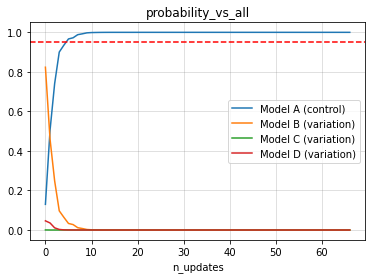

In [21]:
experiment.plot_metric()

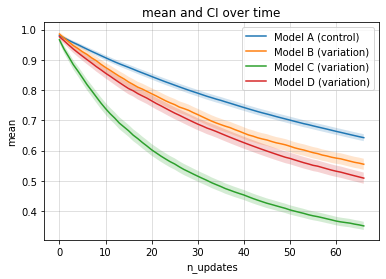

In [22]:
experiment.plot_stats()